In [1]:
def ldata(archive):
    f=open(archive)
    data=[]
    for line in f:
        line=line.strip()
        col=line.split()
        data.append(col)
    return data


In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

red_delfines=ldata("data/dolphins.gml")
genero=ldata("data/dolphinsGender.txt")

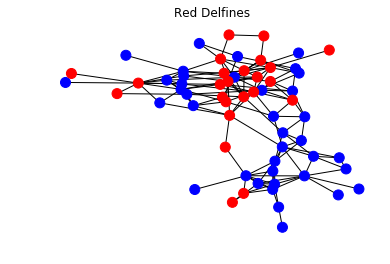

In [3]:
G=nx.read_gml("data/dolphins.gml")

f=[]                     ##f es la lista de nodos tal cual los ordena el nx. Es una especie de orden alfabético
for n in nx.nodes(G):
    f.append(n)

F=[]                    ##F va a ser el nuevo vector de generos pero ordenando los nodos de la misma manera que lo hace nx
for n in f:
   for k,g in genero:
    if k==n:
        F.append([k,g])
# a=0                        ##Todo esto cuenta cuántos nodos de f coinciden con los nodos de F. Es decir, se fija si están en el mismo orden las dos listas de nodos
# k=0
# for n in f:
#    k+=1
#    if n==F[k-1][0]:
#         a+=1
# a

options={'with_labels':False,
        'node_color':["r" if g=="f" else "b" for n,g in F],
        'font_weight':'bold',
        'node_size':100}
plt.title("Red Delfines")

nx.draw(G,**options)


In [4]:
f=0                 ##cuenta cuántos masculinos y femeninos hay. Los no identificados los pone como masculinos
m=0
for n,g in genero:
   if g=="f":
    f+=1
   else:
    m+=1
print(f,m)    

24 38


In [5]:
SG=dict(F)                               ##Quizás sea importante: Le di atributos a los nodos. Quizás es una mejor manera de pintar el grafo. Creo que sirve para calcular el grado
nx.set_node_attributes(G, SG,"genero")
# nx.get_node_attributes(G,"genero")

In [93]:
Enlaces=[]                     
GENERO=nx.get_node_attributes(G,"genero")
for n in G.edges:
    Enlaces.append([n[0],GENERO[n[0]],n[1],GENERO[n[1]]])
EnlacesMM=[]
for n,m,o,p in Enlaces:
    if m=="m" and p=="m":
        EnlacesMM.append([n,o])
EnlacesFF=[]
for n,m,o,p in Enlaces:
    if m=="f" and p=="f":
        EnlacesFF.append([n,o])
Probabilidad_de_enlaces=(len(EnlacesMM)/len(Enlaces),len(EnlacesFF)/len(Enlaces),(len(Enlaces)-len(EnlacesFF)-len(EnlacesMM))/len(Enlaces))
print(Probabilidad_de_enlaces)

(0.37735849056603776, 0.22641509433962265, 0.39622641509433965)
